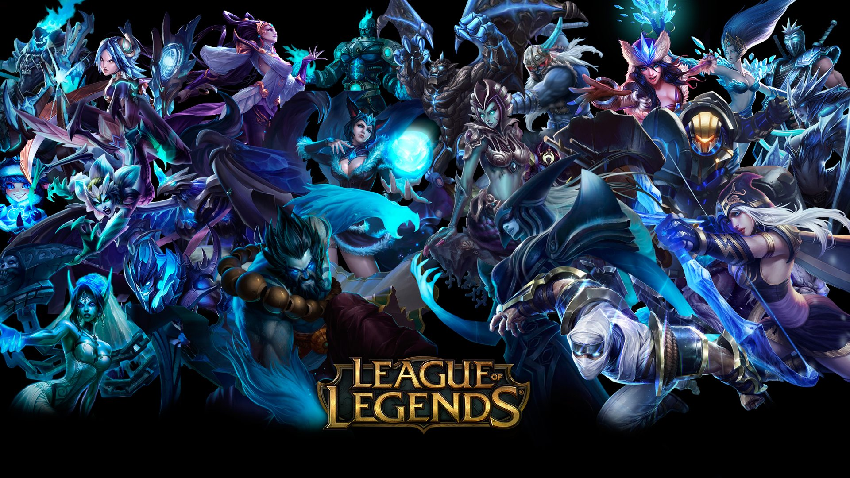

<style>
h1 { 
font-size: 200%; 
}
</style>
**<h1><center>Predicting the Chance of Winning in League of Legends</center></h1>**

**<h><center>Jiaxuan Wu, Yufei Huang, Geng Liu</center></h>**

<head><center>Introduction</center></head>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("LeagueofLegends.csv", sep=',')
df.head()
df = df[df['Type'] == 'International']
df.drop(['League', 'Year', 'Season', 'Type'],axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

In [ ]:
from ast import literal_eval
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

In [ ]:
df.columns

In [ ]:
# Re-format player name to "team-name player-name"
df['redTop'] = df['redTeamTag'] + ' ' + df['redTop']
df['redJungle'] = df['redTeamTag'] + ' ' + df['redJungle']
df['redMiddle'] = df['redTeamTag'] + ' ' + df['redMiddle']
df['redADC'] = df['redTeamTag'] + ' ' + df['redADC']
df['redSupport'] = df['redTeamTag'] + ' ' + df['redSupport']

df['blueTop'] = df['blueTeamTag'] + ' ' + df['blueTop']
df['blueJungle'] = df['blueTeamTag'] + ' ' + df['blueJungle']
df['blueMiddle'] = df['blueTeamTag'] + ' ' + df['blueMiddle']
df['blueADC'] = df['blueTeamTag'] + ' ' + df['blueADC']
df['blueSupport'] = df['blueTeamTag'] + ' ' + df['blueSupport']

In [ ]:
df.loc[0]['redTop']

In [ ]:
df_red = df.copy(deep=True)
df_blue = df.copy(deep=True)
df_red.drop(columns = ['blueTeamTag', 'bResult', 'goldblue', 'bKills', 'bTowers', 'bInhibs', 'bDragons',\
                       'bBarons', 'bHeralds', 'blueTop', 'blueTopChamp', 'goldblueTop', \
                       'blueJungle', 'blueJungleChamp', 'goldblueJungle', 'blueMiddle', \
                       'blueMiddleChamp', 'goldblueMiddle', 'blueADC', 'blueADCChamp', 'goldblueADC', \
                       'blueSupport', 'blueSupportChamp', 'goldblueSupport', 'blueBans'], inplace=True)
df_blue.drop(columns = ['redTeamTag', 'rResult', 'goldred', 'rKills', 'rTowers', 'rInhibs', 'rDragons',\
                       'rBarons', 'rHeralds', 'redTop', 'redTopChamp', 'goldredTop', \
                       'redJungle', 'redJungleChamp', 'goldredJungle', 'redMiddle', \
                       'redMiddleChamp', 'goldredMiddle', 'redADC', 'redADCChamp', 'goldredADC', \
                       'redSupport', 'redSupportChamp', 'goldredSupport', 'redBans'], inplace=True)

df_red.rename({'redTeamTag': 'teamTag',\
               'rResult': 'result',\
               'goldred': 'gold',\
               'rKills': 'kills',\
               'rTowers': 'towers',\
               'rInhibs': 'inhibs',\
               'rDragons': 'dragons',\
               'rBarons': 'barons',\
               'rHeralds': 'heralds',\
               'redTop': 'top', \
               'redTopChamp': 'topChamp',\
               'goldredTop': 'goldTop',\
               'redJungle': 'jungle',\
               'redJungleChamp': 'jungleChamp',\
               'goldredJungle': 'goldJungle',\
               'redMiddle': 'middle', \
               'redMiddleChamp': 'middleChamp',\
               'goldredMiddle': 'goldMiddle',\
               'redADC': 'ADC',\
               'redADCChamp': 'ADCChamp',\
               'goldredADC': 'goldADC', \
               'redSupport': 'support',\
               'redSupportChamp': 'supportChamp',\
               'goldredSupport': 'goldSupport',\
               'redBans': 'bans'}, inplace=True, axis='columns')

df_blue.rename({'blueTeamTag': 'teamTag',\
               'bResult': 'result',\
               'goldblue': 'gold',\
               'bKills': 'kills',\
               'bTowers': 'towers',\
               'bInhibs': 'inhibs',\
               'bDragons': 'dragons',\
               'bBarons': 'barons',\
               'bHeralds': 'heralds',\
               'blueTop': 'top', \
               'blueTopChamp': 'topChamp',\
               'goldblueTop': 'goldTop',\
               'blueJungle': 'jungle',\
               'blueJungleChamp': 'jungleChamp',\
               'goldblueJungle': 'goldJungle',\
               'blueMiddle': 'middle', \
               'blueMiddleChamp': 'middleChamp',\
               'goldblueMiddle': 'goldMiddle',\
               'blueADC': 'ADC',\
               'blueADCChamp': 'ADCChamp',\
               'goldblueADC': 'goldADC', \
               'blueSupport': 'support',\
               'blueSupportChamp': 'supportChamp',\
               'goldblueSupport': 'goldSupport',\
               'blueBans': 'bans'}, inplace=True, axis='columns')

df_all = pd.concat([df_red, df_blue], sort = False)

In [ ]:
df_all

### ADC and support combo frequency analysis 

In [ ]:

df_combo = df_all.groupby(['ADCChamp', 'supportChamp']).agg({'result' :  'sum',
                                                             'ADC' : 'count',}).reset_index()
combo_size = df_all.shape[0]
df_combo.rename({'ADC':'frequency'}, inplace=True, axis='columns')
df_combo['winRatio'] = df_combo['result'] / df_combo['frequency']
df_combo['frequency'].unique()

In [ ]:
df_combo['combo'] = df_combo['ADCChamp'] + ', ' + df_combo['supportChamp']
df_combo.sort_values(by='frequency', inplace=True, ascending=False)
df_combo_top = df_combo.head(20)
type(df_combo_top)

f, ax = plt.subplots(figsize=(12,9))
freq_map = sns.barplot(x='combo', y='frequency', data=df_combo_top )
freq_map.set_xticklabels(freq_map.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

pivot = df_combo.pivot(index='supportChamp', columns='ADCChamp', values='winRatio')
f, ax = plt.subplots(figsize=(18,15))
combo_win = sns.heatmap(pivot, cmap=sns.cubehelix_palette(8), square=True, linewidths=0.5, ax=ax, annot=True)
plt.show()

In [ ]:
cmap = sns.diverging_palette(220,10, as_cmap=True)

pivot = df_combo.pivot(index='supportChamp', columns='ADCChamp', values='frequency')
f, ax = plt.subplots(figsize=(18,15))
combo_win = sns.heatmap(pivot, cmap=sns.cubehelix_palette(8), square=True, linewidths=0.5, ax=ax, annot=True)
plt.show()

In [ ]:
df_combo